# Preparación del entorno y carga de 

Este código carga los datos, realiza algunas transformaciones básicas y prepara los conjuntos de entrenamiento y prueba.

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
# Asumimos que los datos están en un archivo CSV llamado 'airline_satisfaction.csv'
df = pd.read_csv('airline_passenger_satisfaction.csv')

# Visualizar las primeras filas y la información del DataFrame
print(df.head())
print(df.info())

# Verificar valores nulos
print(df.isnull().sum())

# Estadísticas descriptivas
print(df.describe())

# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Separar características y variable objetivo
X = df.drop('satisfaction', axis=1)
y = df['satisfaction']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                

# EDA

Este código genera visualizaciones para ayudarnos a entender la distribución de la satisfacción del cliente, las correlaciones entre variables, y cómo se relacionan las diferentes características con la satisfacción.

1. Separar las variables numéricas y categóricas.
2. Codificar la variable objetivo 'satisfaction'.
3. Calcular la correlación solo para las variables numéricas.


<Figure size 2000x1500 with 0 Axes>

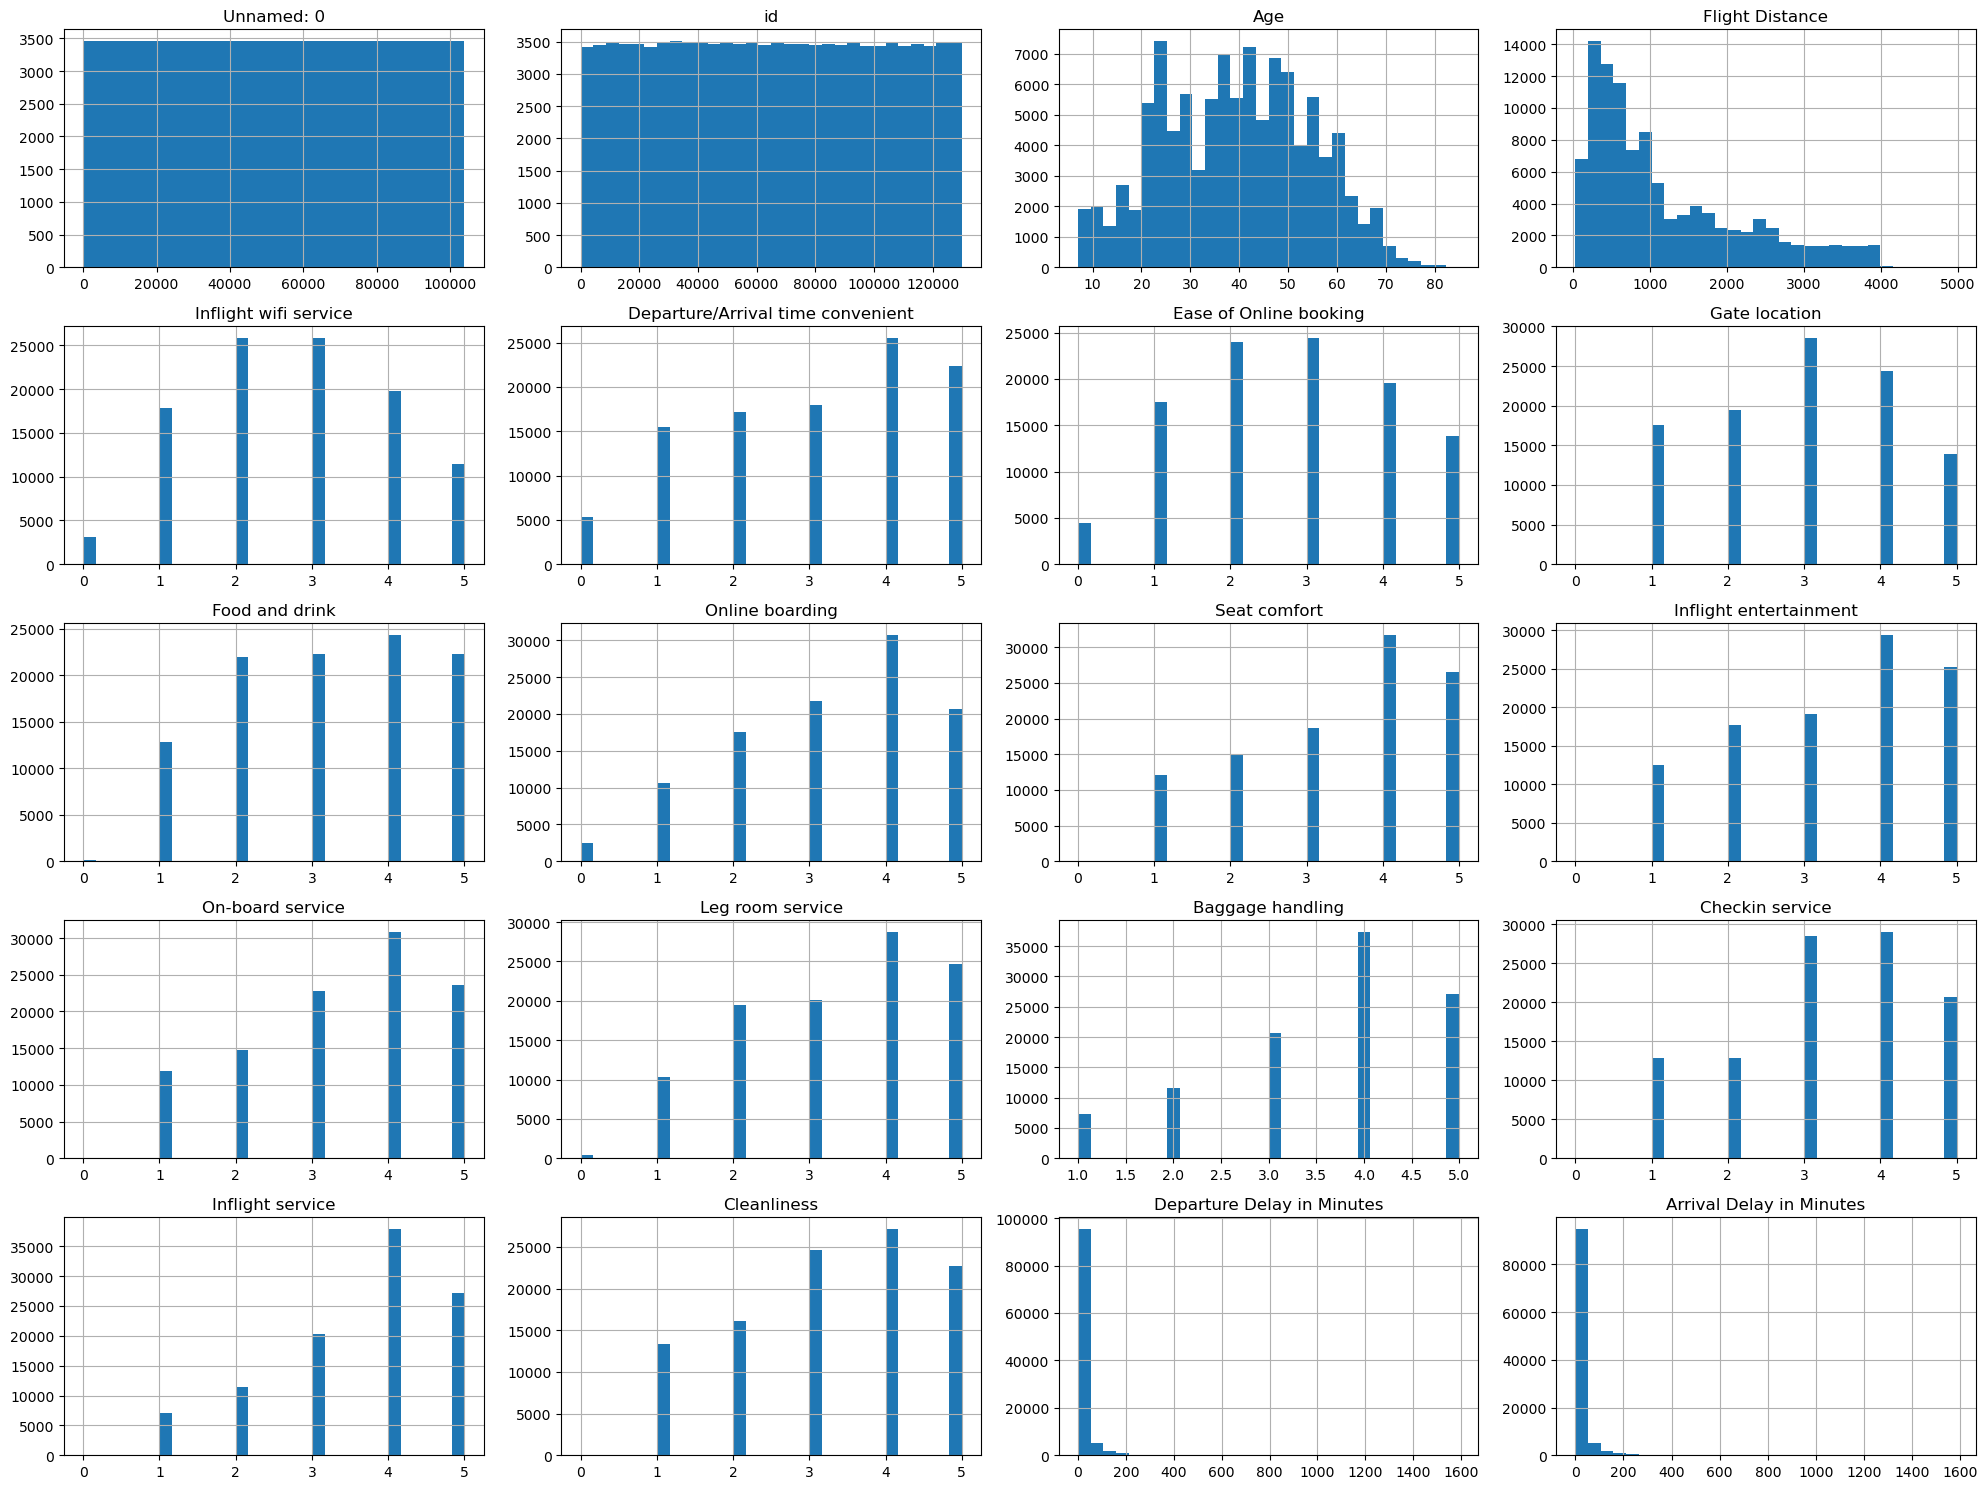

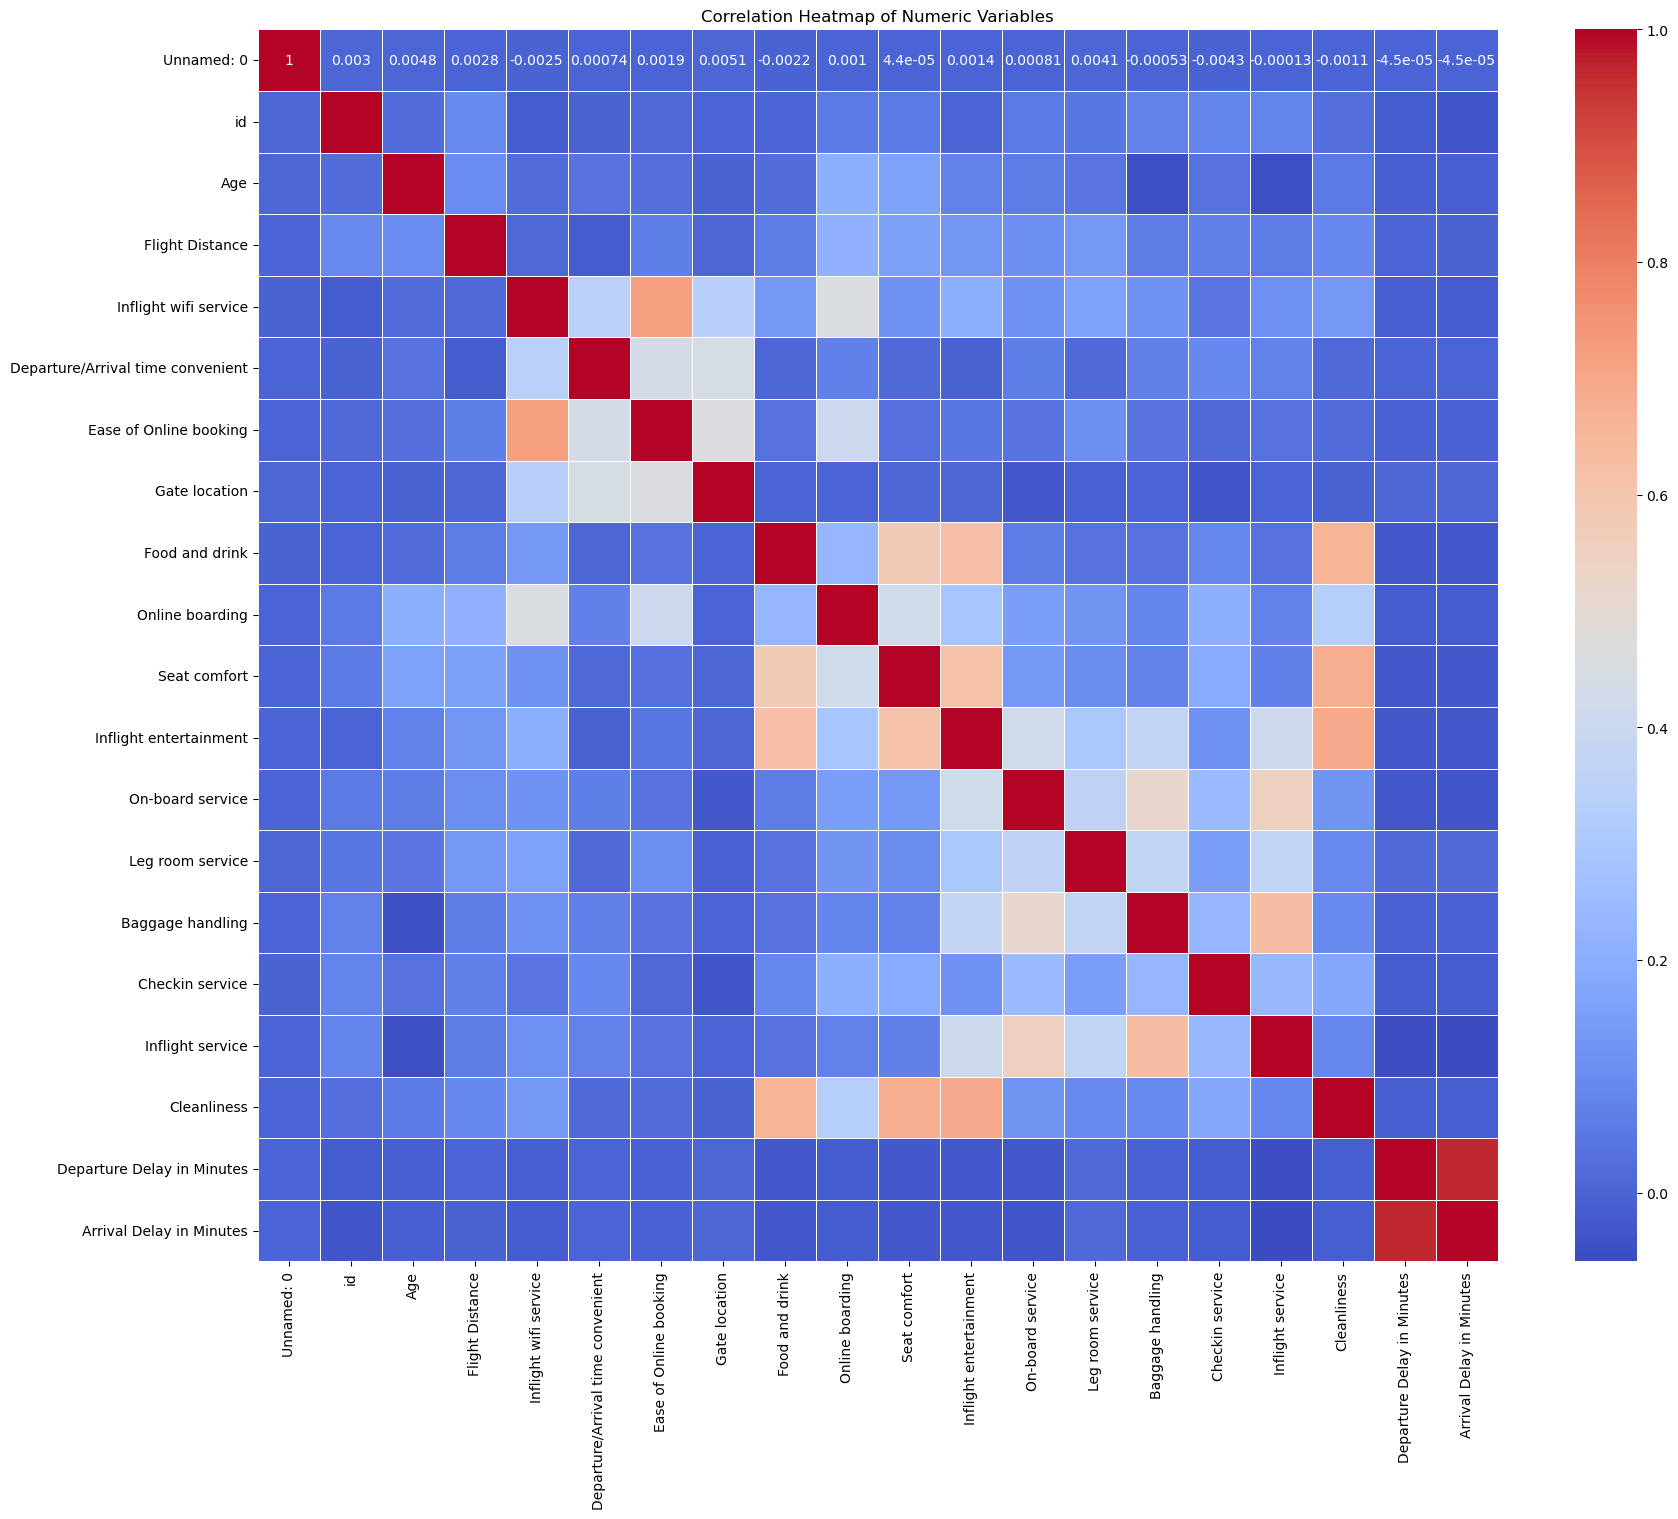

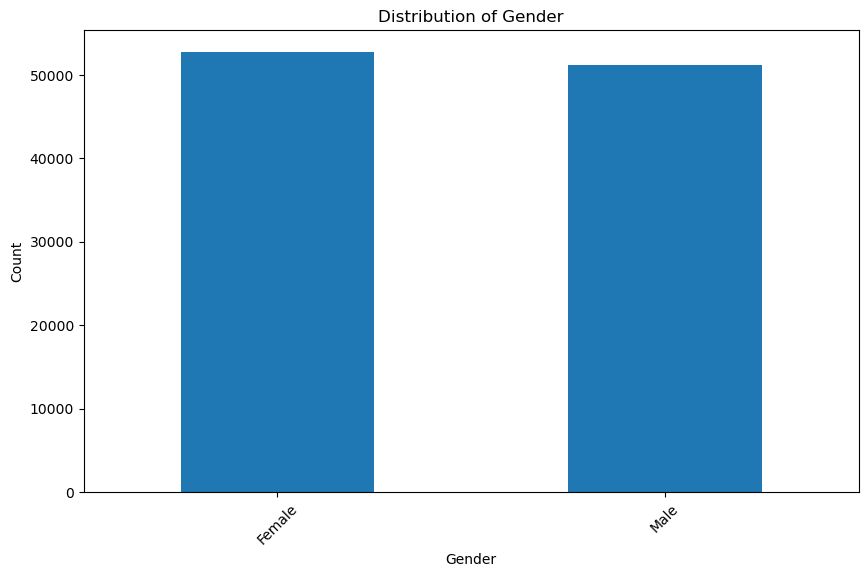

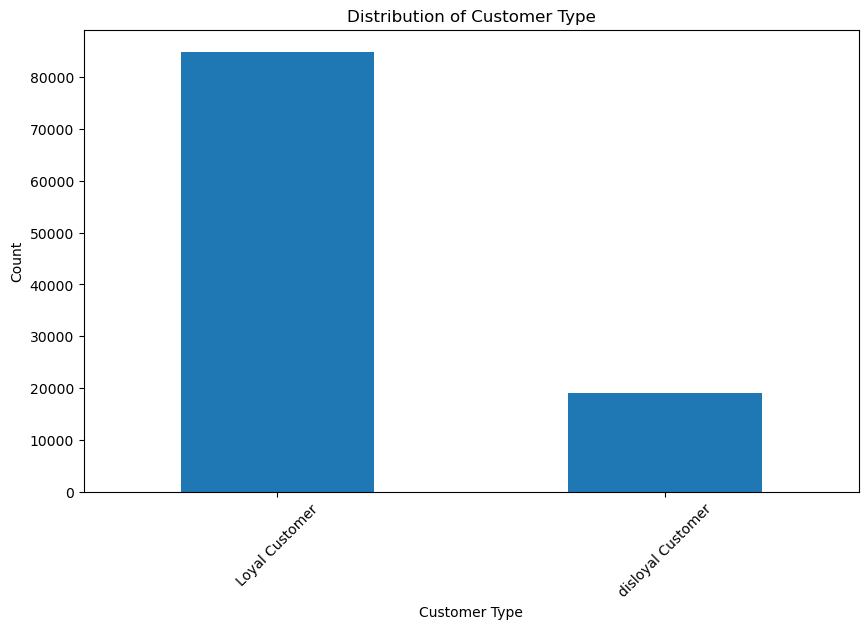

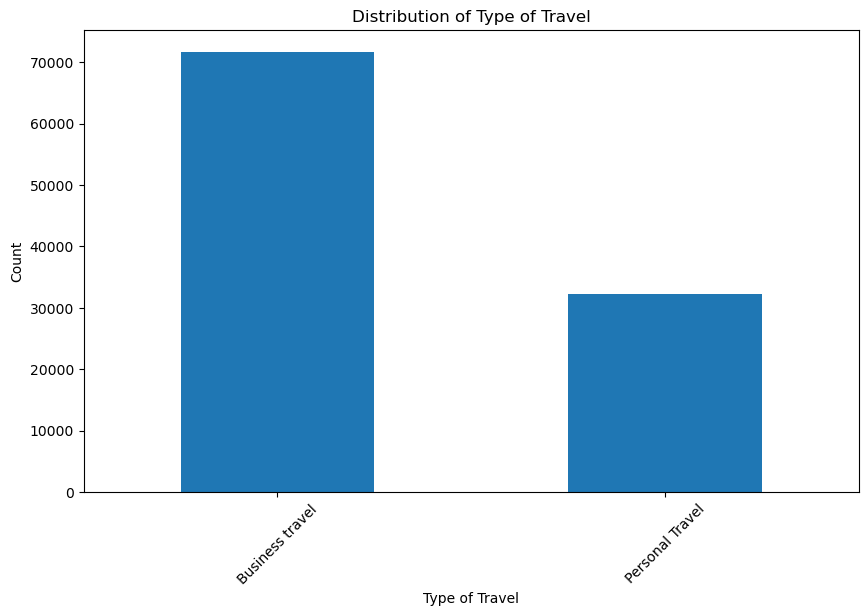

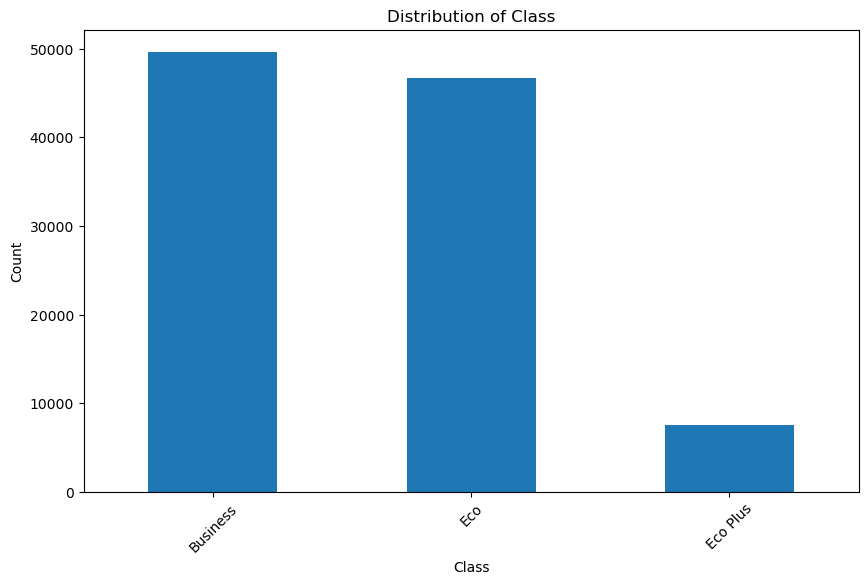

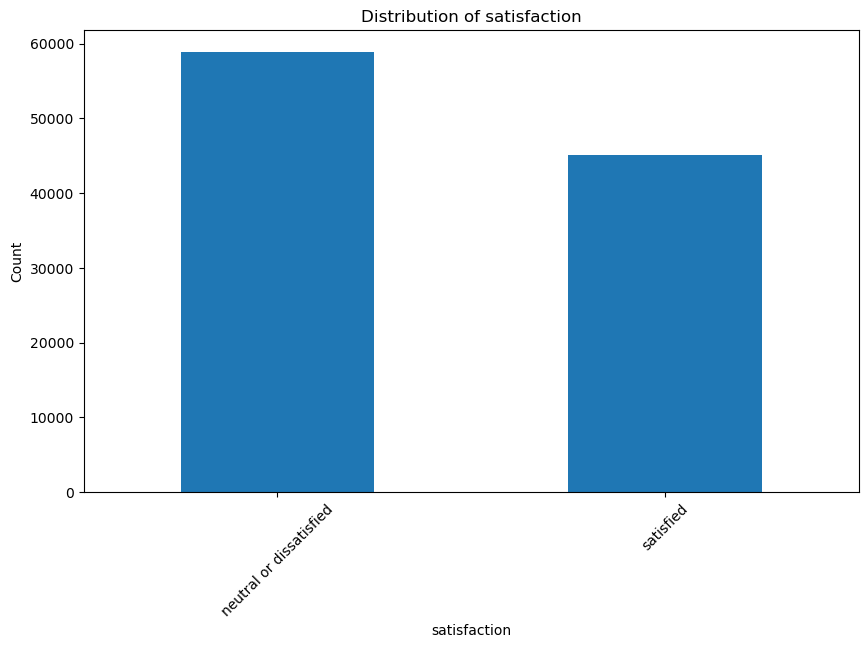

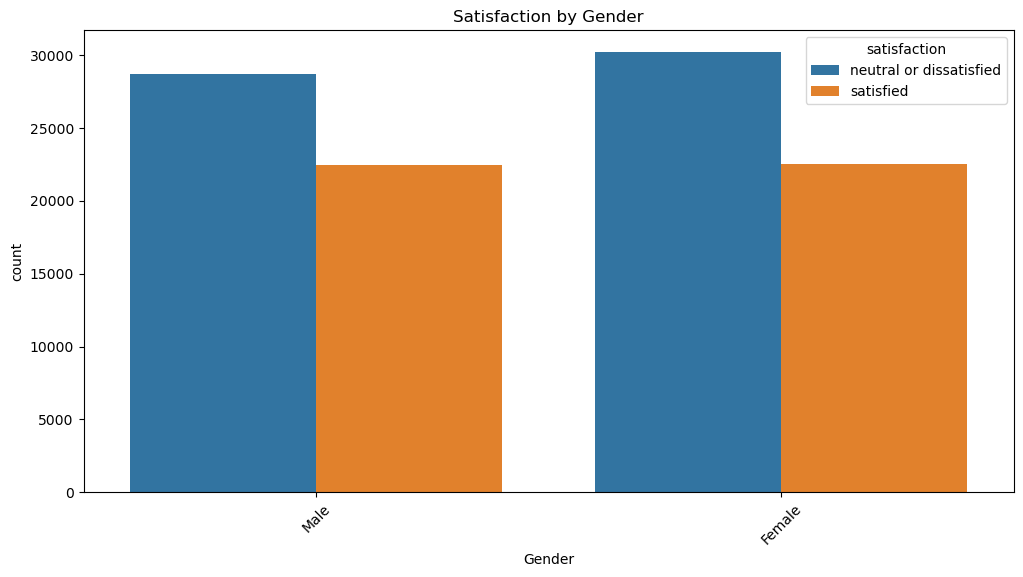

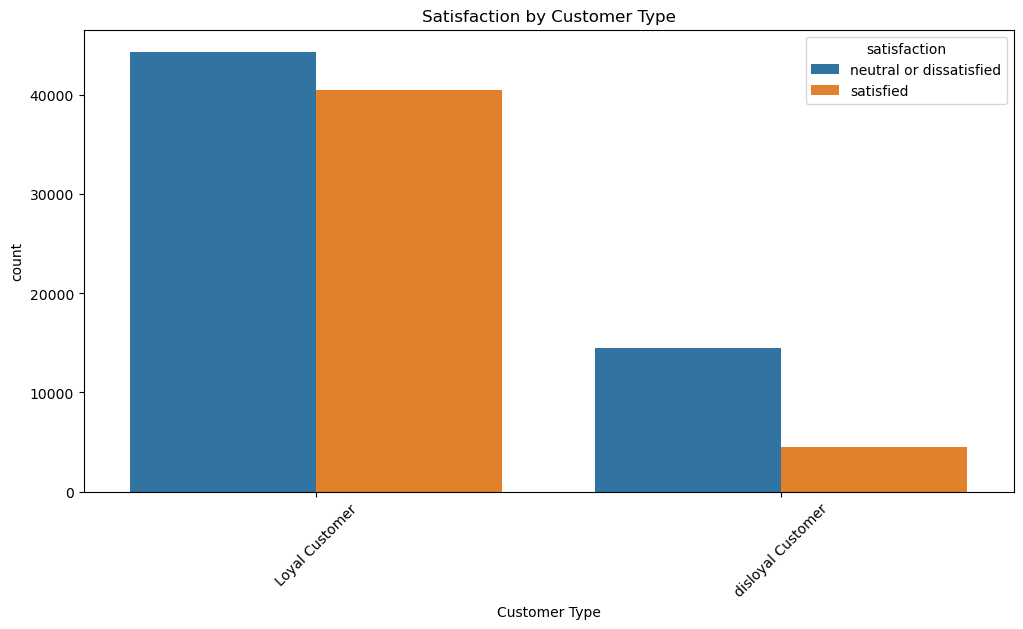

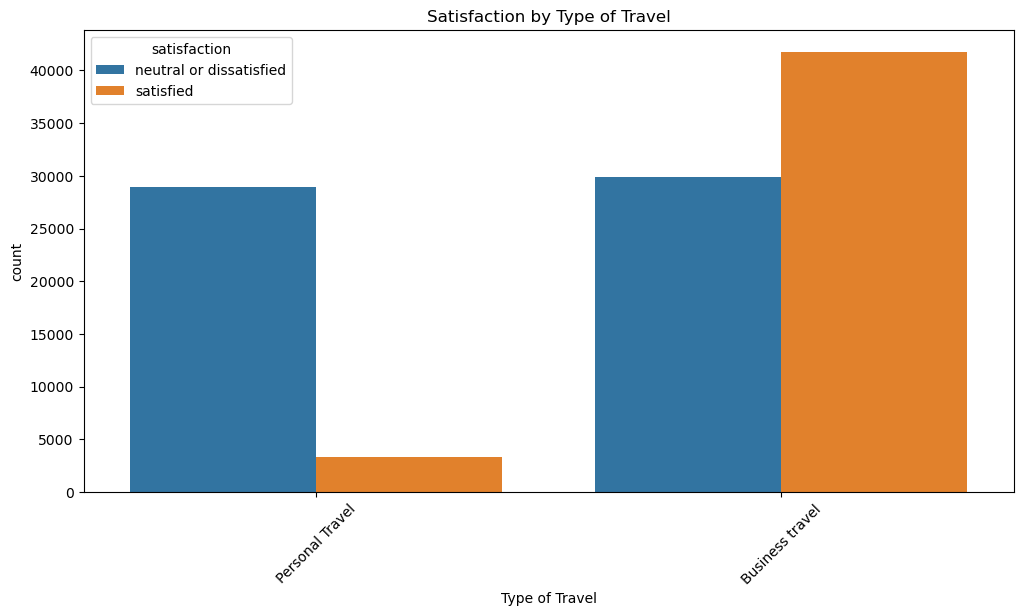

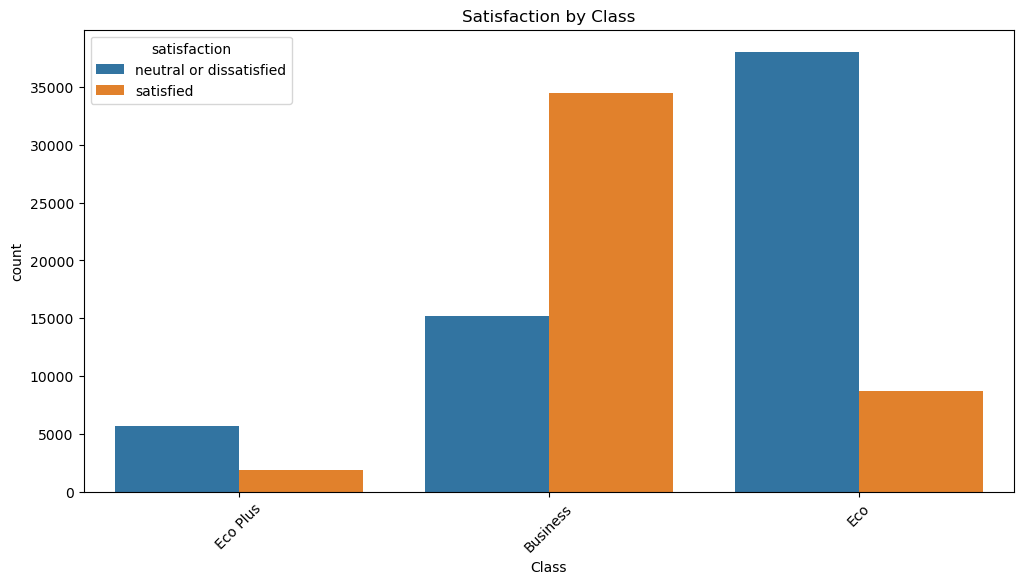

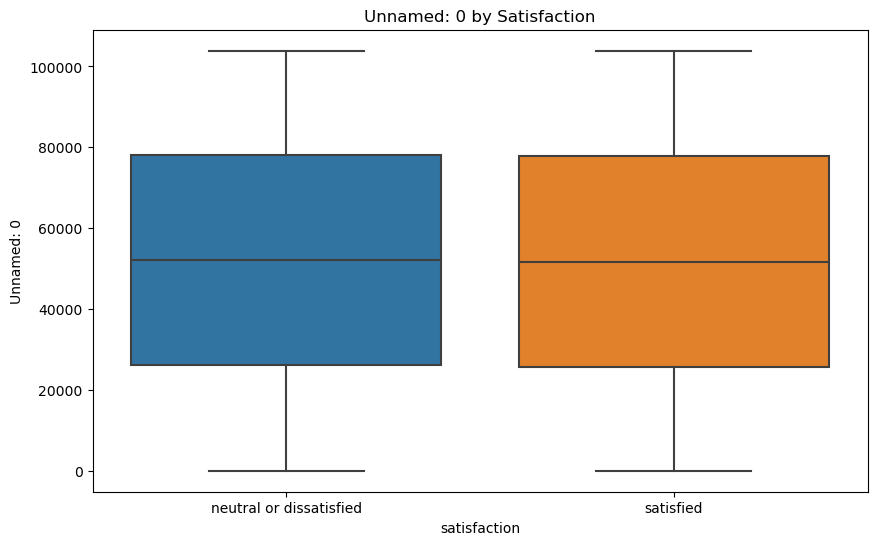

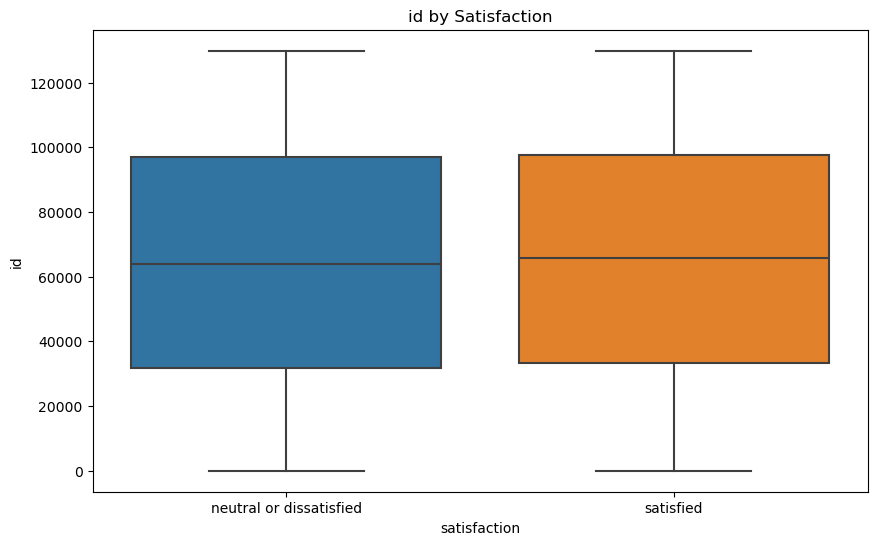

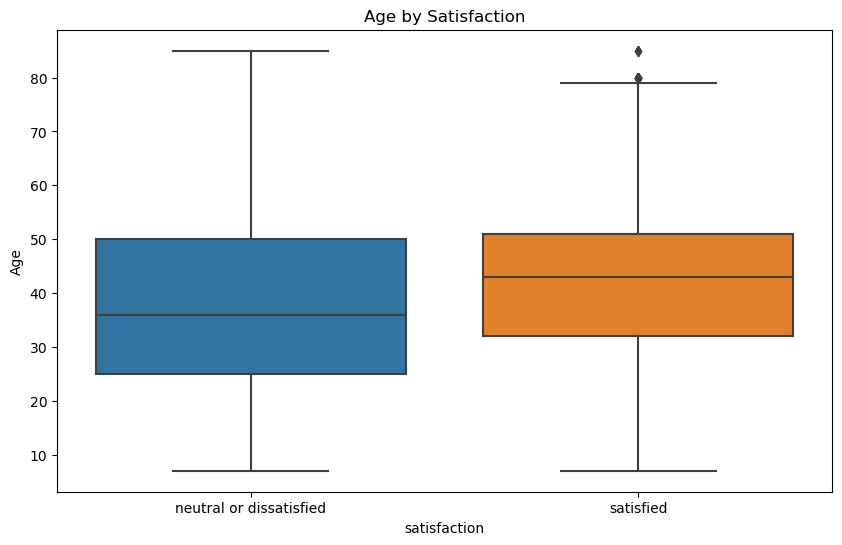

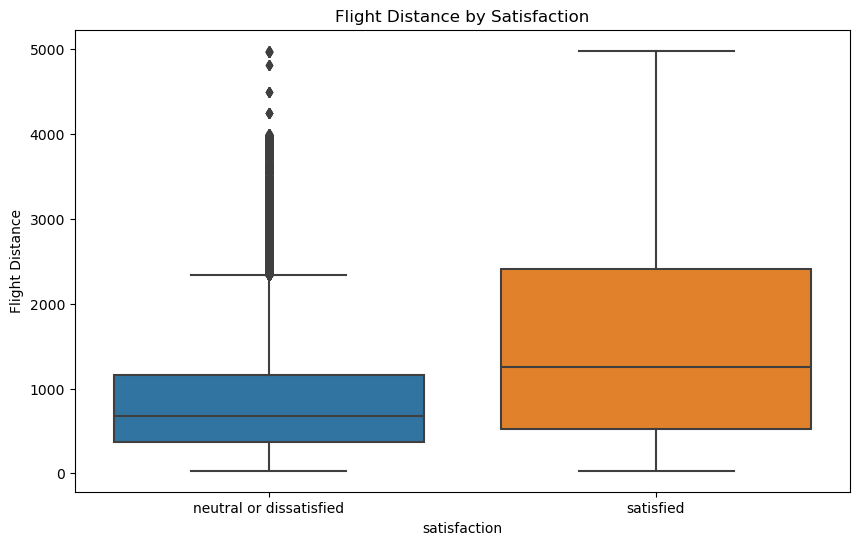

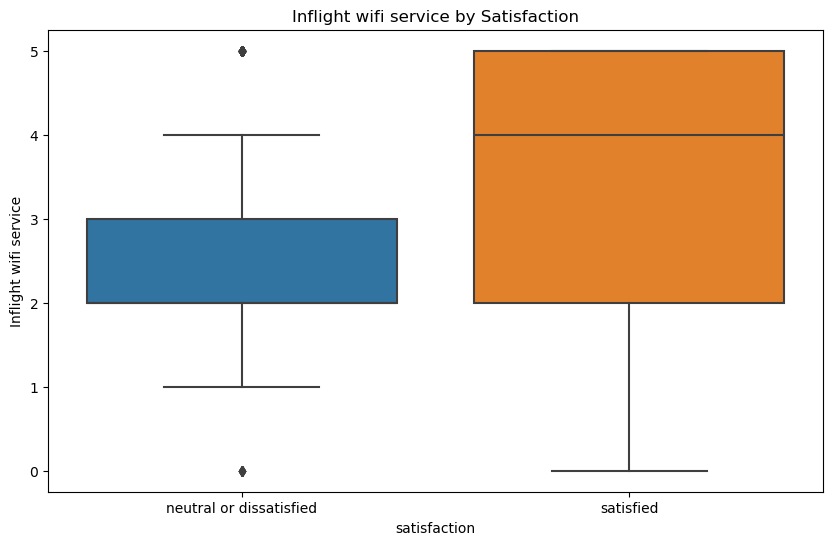

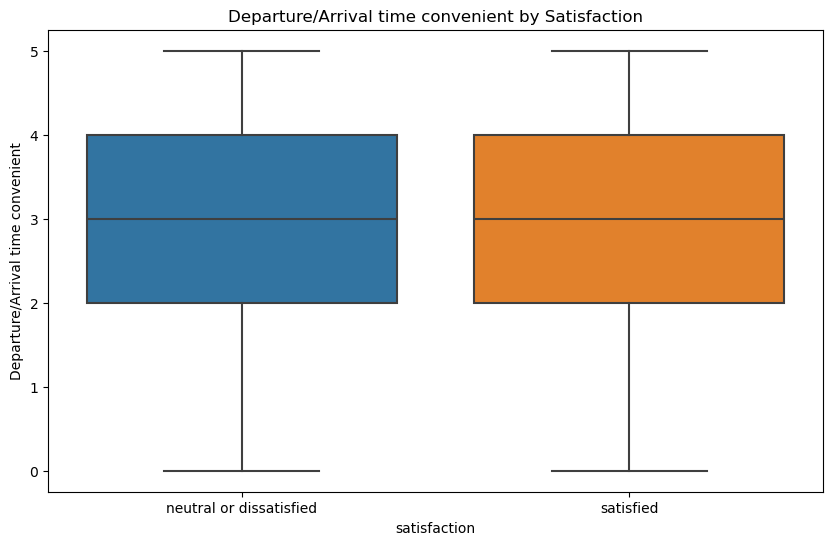

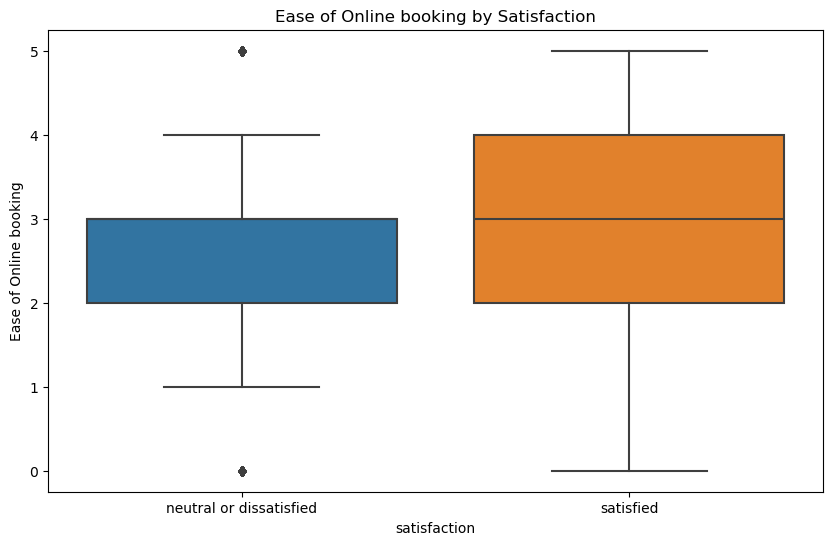

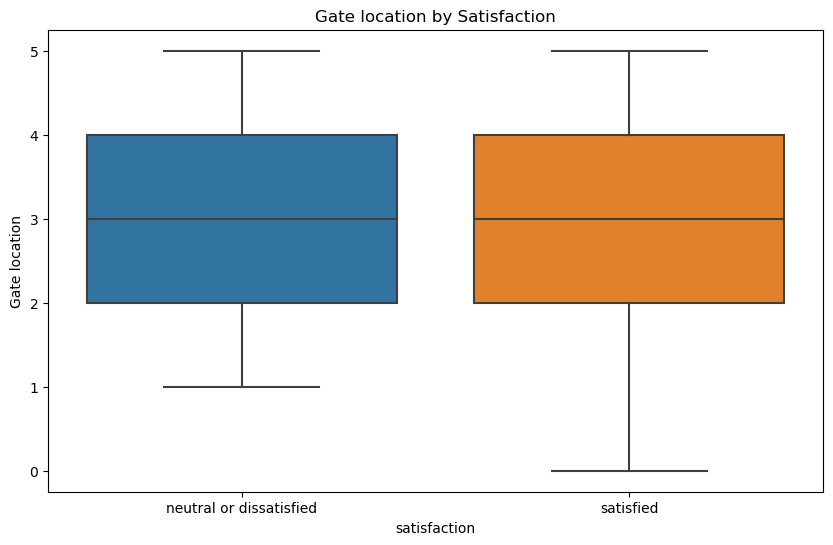

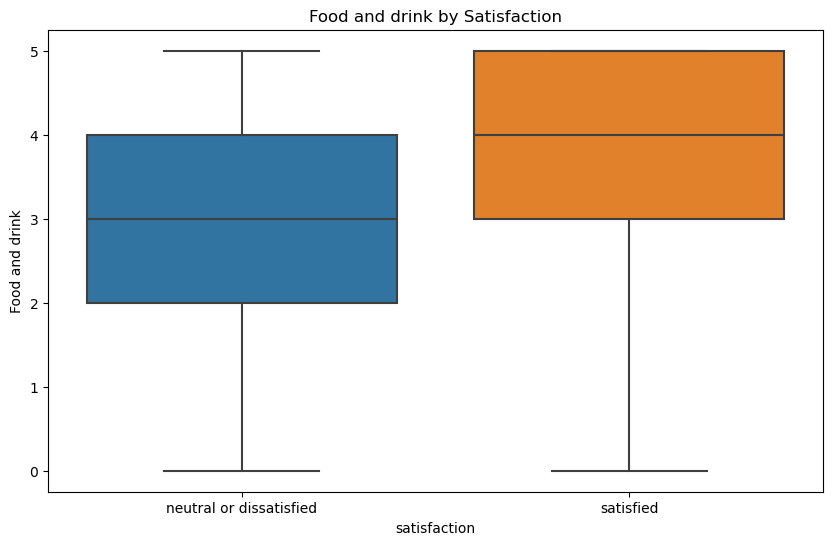

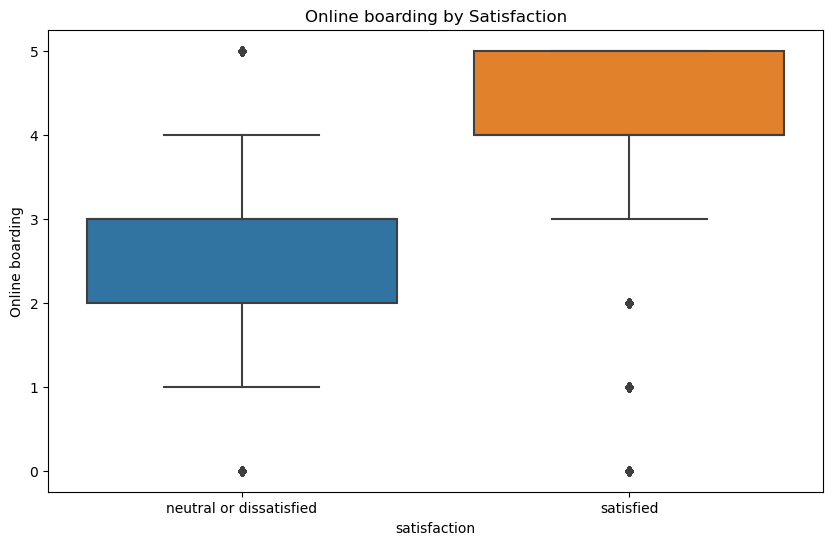

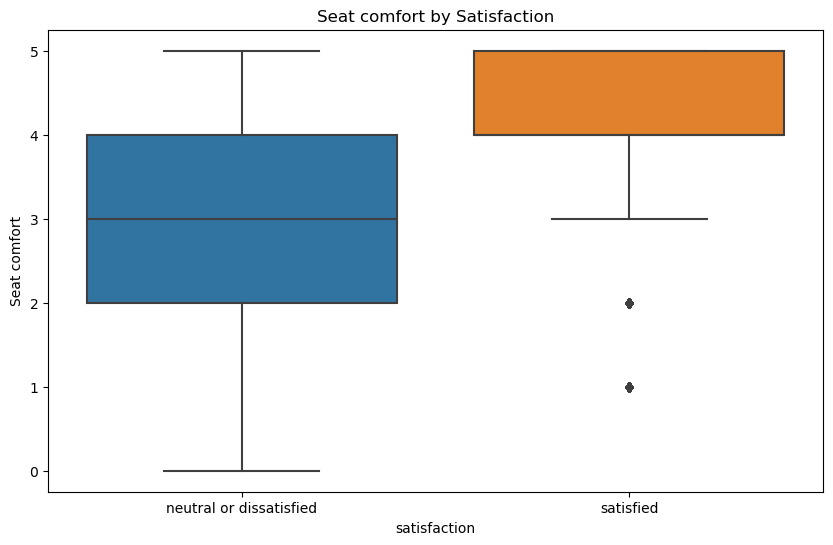

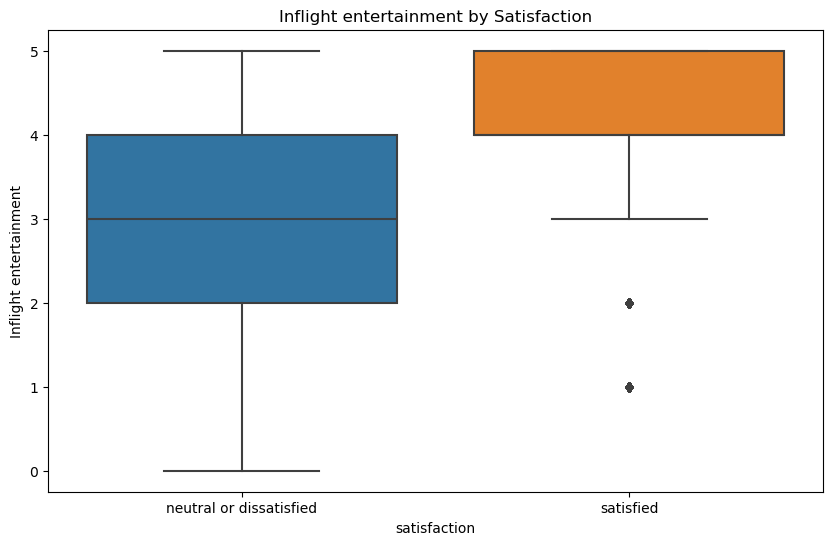

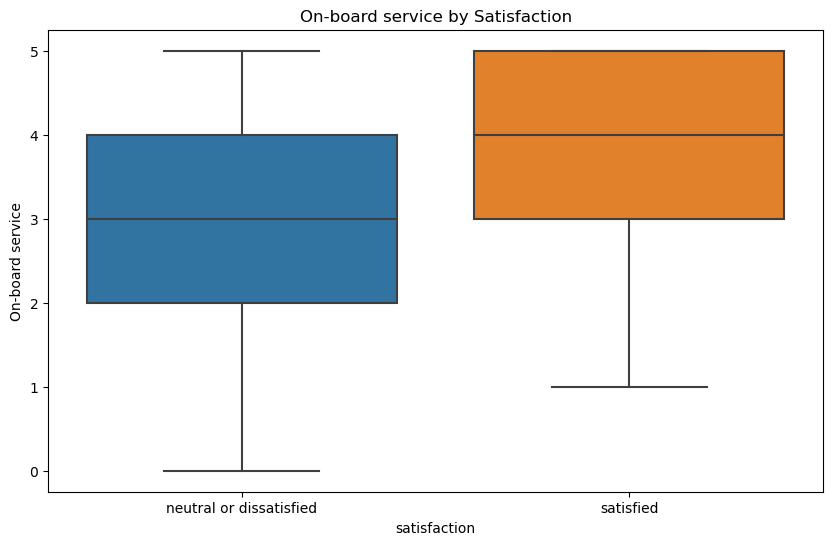

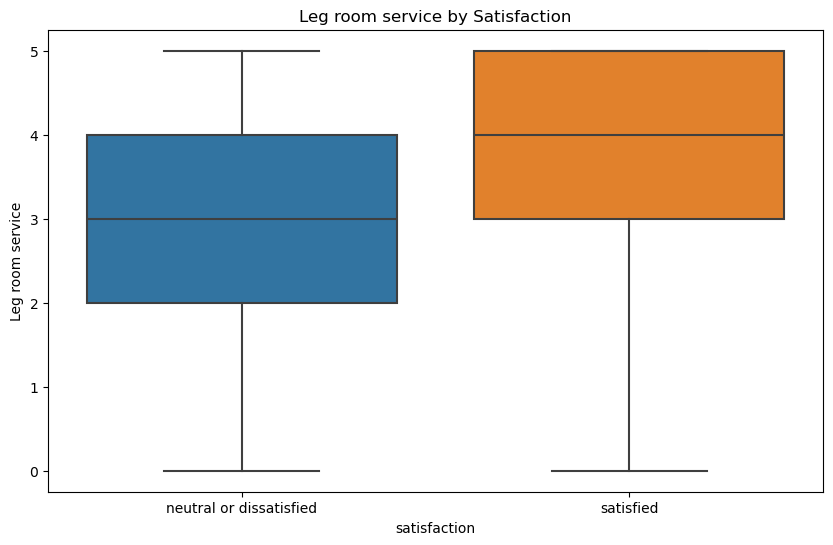

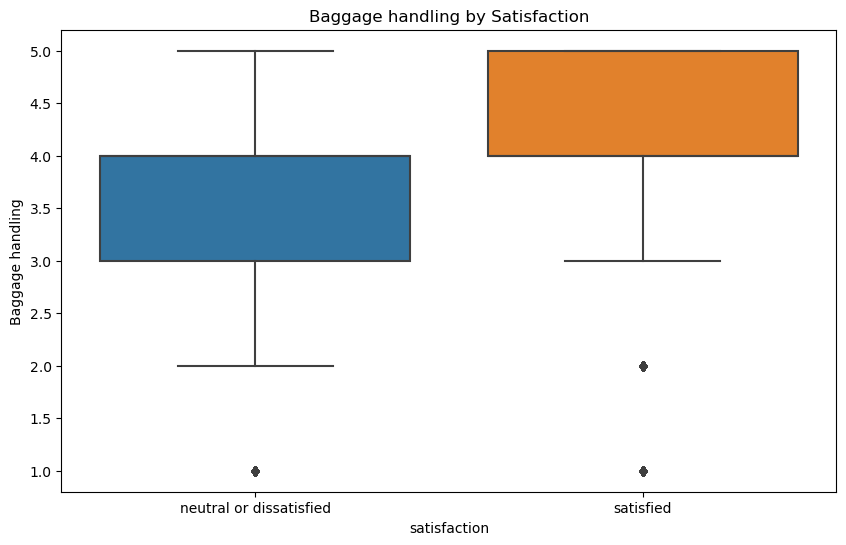

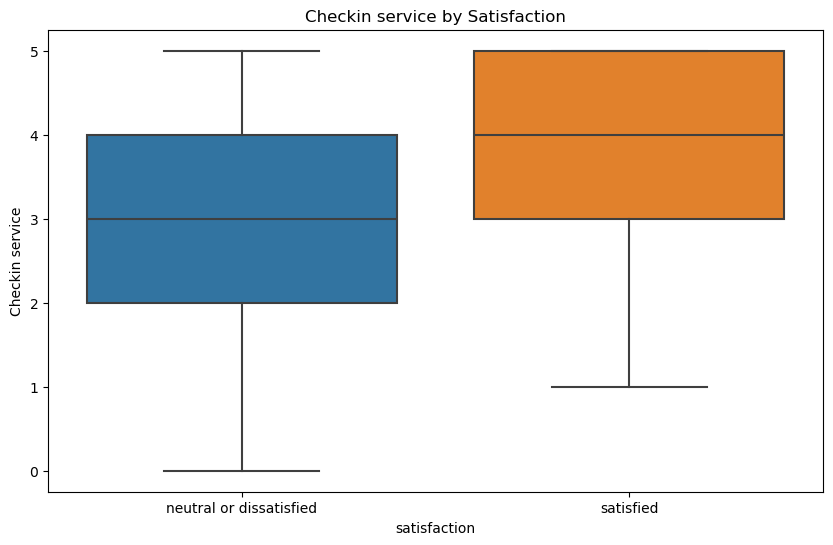

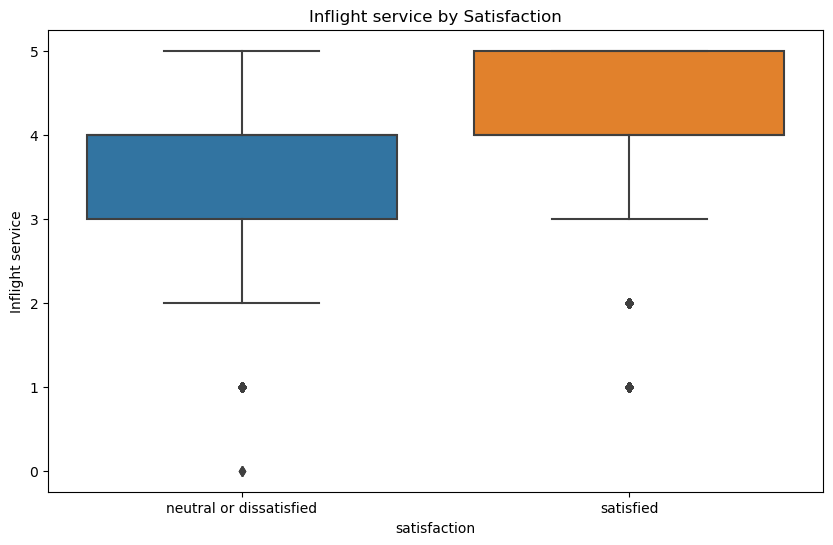

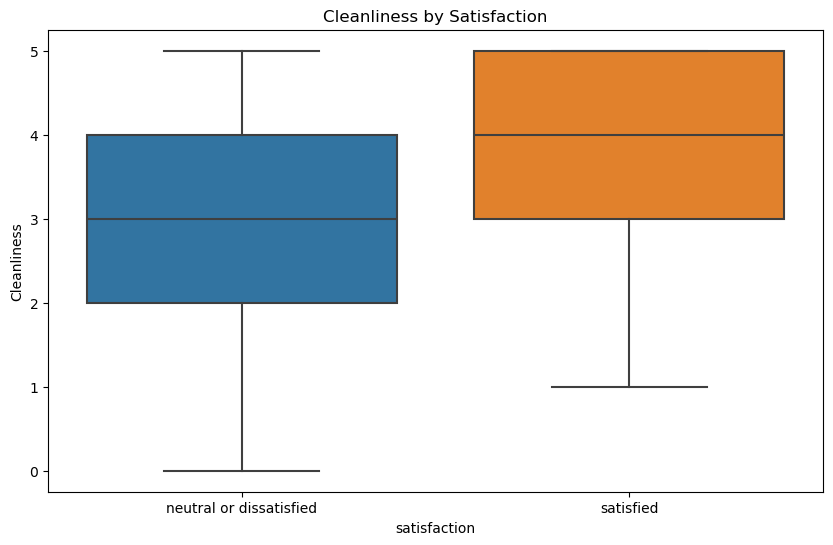

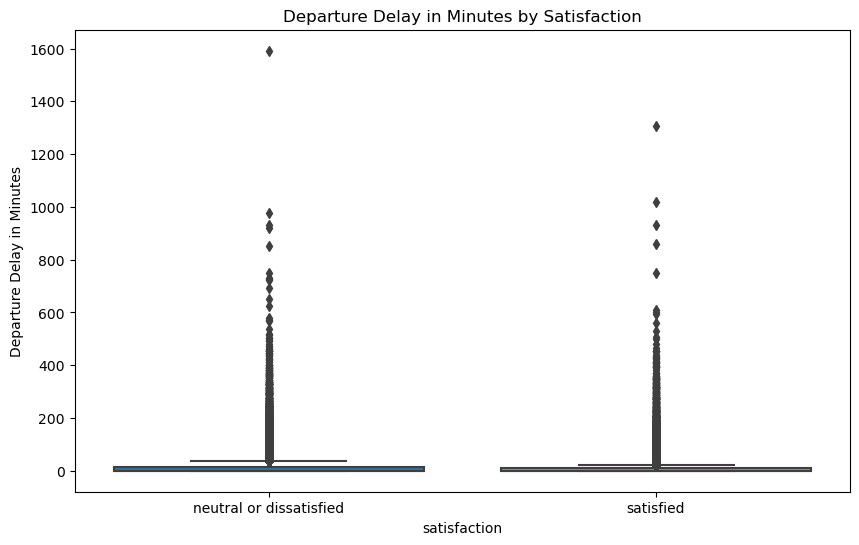

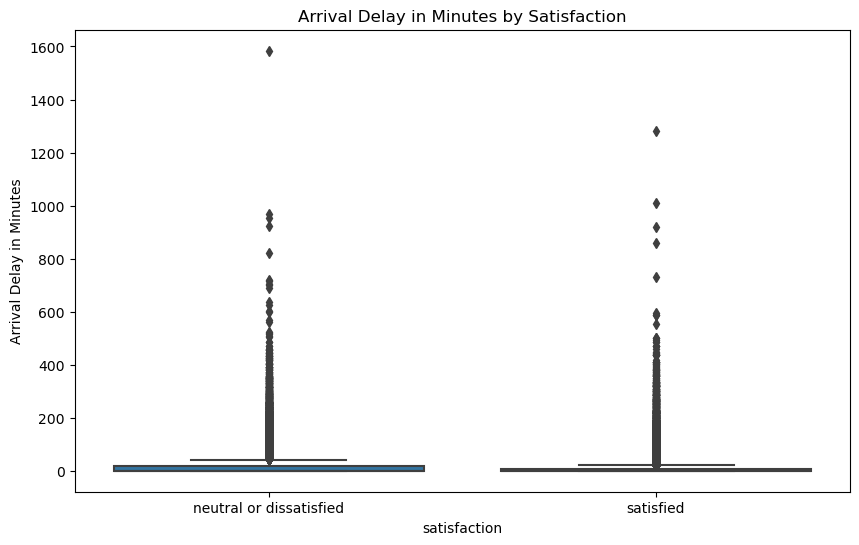

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Cargar los datos
df = pd.read_csv('airline_passenger_satisfaction.csv')  # Asegúrate de poner la ruta correcta

# Separar variables numéricas y categóricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Codificar la variable objetivo
le = LabelEncoder()
df['satisfaction_encoded'] = le.fit_transform(df['satisfaction'])

# Análisis de variables numéricas
plt.figure(figsize=(20, 15))
df[numeric_columns].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

# Correlación entre variables numéricas
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# Análisis de variables categóricas
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Relación entre variables categóricas y la satisfacción
for col in categorical_columns:
    if col != 'satisfaction':
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x=col, hue='satisfaction')
        plt.title(f'Satisfaction by {col}')
        plt.xticks(rotation=45)
        plt.show()

# Relación entre variables numéricas y la satisfacción
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='satisfaction', y=col)
    plt.title(f'{col} by Satisfaction')
    plt.show()

# Creación y entrenamiento del modelo

Este código entrena el modelo, realiza predicciones, evalúa su rendimiento y visualiza la importancia de las características.

In [5]:
# Crear y entrenar el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluar el modelo
print("Informe de Clasificación:")
print(classification_report(y_test, y_pred))

print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))

print("\nPuntuación AUC-ROC:")
print(roc_auc_score(y_test, y_pred_proba))

# Calcular y visualizar la importancia de las características
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Características Más Importantes')
plt.show()

# Calcular el overfitting
train_score = rf_model.score(X_train_scaled, y_train)
test_score = rf_model.score(X_test_scaled, y_test)
overfitting = train_score - test_score
print(f"\nOverfitting: {overfitting:.4f}")

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Creación de una aplicación simple para productivizar el modelo

In [6]:
import streamlit as st
import pandas as pd
import joblib

# Cargar el modelo entrenado y el scaler
model = joblib.load('rf_model.joblib')
scaler = joblib.load('scaler.joblib')

st.title('Predictor de Satisfacción de Clientes de F5 Airlines')

# Crear inputs para todas las características necesarias
age = st.slider('Edad', 0, 100, 30)
flight_distance = st.number_input('Distancia de vuelo', min_value=0)
wifi_service = st.slider('Servicio de WiFi a bordo', 0, 5, 3)
departure_arrival_time = st.slider('Conveniencia del horario de salida/llegada', 0, 5, 3)
ease_of_booking = st.slider('Facilidad de reserva en línea', 0, 5, 3)
# ... Añadir más inputs para todas las características necesarias ...

# Crear un botón para realizar la predicción
if st.button('Predecir Satisfacción'):
    # Crear un DataFrame con los inputs del usuario
    input_data = pd.DataFrame({
        'Age': [age],
        'Flight Distance': [flight_distance],
        'Inflight wifi service': [wifi_service],
        'Departure/Arrival time convenient': [departure_arrival_time],
        'Ease of Online booking': [ease_of_booking],
        # ... Añadir más características aquí ...
    })
    
    # Escalar los datos de entrada
    input_scaled = scaler.transform(input_data)
    
    # Realizar la predicción
    prediction = model.predict(input_scaled)
    probability = model.predict_proba(input_scaled)[0][1]
    
    # Mostrar el resultado
    st.write(f"Predicción: {'Satisfecho' if prediction[0] == 1 else 'Insatisfecho'}")
    st.write(f"Probabilidad de satisfacción: {probability:.2f}")

FileNotFoundError: [Errno 2] No such file or directory: 'rf_model.joblib'